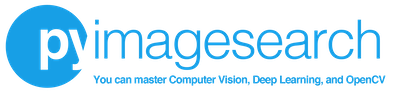

# Building image pairs for siamese networks with Python

### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Building image pairs for siamese networks with Python](https://www.pyimagesearch.com/2020/11/23/building-image-pairs-for-siamese-networks-with-python/) blog post published on 11-23-20.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook.

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [3]:
#!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/siamese-image-pairs/siamese-image-pairs.zip
#!unzip -qq siamese-image-pairs.zip
#cd siamese-image-pairs

## Blog Post Code

### Import Packages

In [4]:
# import the necessary packages
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [5]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	plt.figure(figsize=(12, 12))
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing our image pair generator for siamese networks

In [6]:
def make_pairs(images, labels):
	# initialize two empty lists to hold the (image, image) pairs and
	# labels to indicate if a pair is positive or negative
	pairImages = [] # [[im1, im2], [im3, im4], ...]
	pairLabels = [] # [[0], [1]] 0: negative, 1: positive

	# calculate the total number of classes present in the dataset
	# and then build a list of indexes for each class label that
	# provides the indexes for all examples with a given label
    # -> for each label/class, all image indices of that class
	numClasses = len(np.unique(labels))
	idx = [np.where(labels == i)[0] for i in range(0, numClasses)]

	# loop over all images
	for idxA in range(len(images)):
		# grab the current image and label belonging to the current
		# iteration
		currentImage = images[idxA]
		label = labels[idxA]

		# randomly pick an image that belongs to the *same* class
		# label
		idxB = np.random.choice(idx[label])
		posImage = images[idxB]

		# prepare a positive pair and update the images and labels
		# lists, respectively
		pairImages.append([currentImage, posImage])
		pairLabels.append([1])

		# grab the indices for each of the class labels *not* equal to
		# the current label and randomly pick an image corresponding
		# to a label *not* equal to the current label
		negIdx = np.where(labels != label)[0]
		negImage = images[np.random.choice(negIdx)]

		# prepare a negative pair of images and update our lists
		pairImages.append([currentImage, negImage])
		pairLabels.append([0])

	# return a 2-tuple of our image pairs and labels
	return (np.array(pairImages), np.array(pairLabels))

In [7]:
# load MNIST dataset and scale the pixel values to the range of [0, 1]
print("[INFO] loading MNIST dataset...")
(trainX, trainY), (testX, testY) = mnist.load_data()

# build the positive and negative image pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

# initialize the list of images that will be used when building our
# montage
images = []

[INFO] loading MNIST dataset...
[INFO] preparing positive and negative pairs...


In [14]:
labels = trainY
numClasses = len(np.unique(labels))
idx = [np.where(labels == i)[0] for i in range(0, numClasses)]

In [15]:
# For each label/class, all image indices of that class
idx

[array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),
 array([    3,     6,     8, ..., 59979, 59984, 59994], dtype=int64),
 array([    5,    16,    25, ..., 59983, 59985, 59991], dtype=int64),
 array([    7,    10,    12, ..., 59978, 59980, 59996], dtype=int64),
 array([    2,     9,    20, ..., 59943, 59951, 59975], dtype=int64),
 array([    0,    11,    35, ..., 59968, 59993, 59997], dtype=int64),
 array([   13,    18,    32, ..., 59982, 59986, 59998], dtype=int64),
 array([   15,    29,    38, ..., 59963, 59977, 59988], dtype=int64),
 array([   17,    31,    41, ..., 59989, 59995, 59999], dtype=int64),
 array([    4,    19,    22, ..., 59973, 59990, 59992], dtype=int64)]

In [11]:
pairTrain.shape

(120000, 2, 28, 28)

In [12]:
labelTrain.shape

(120000, 1)

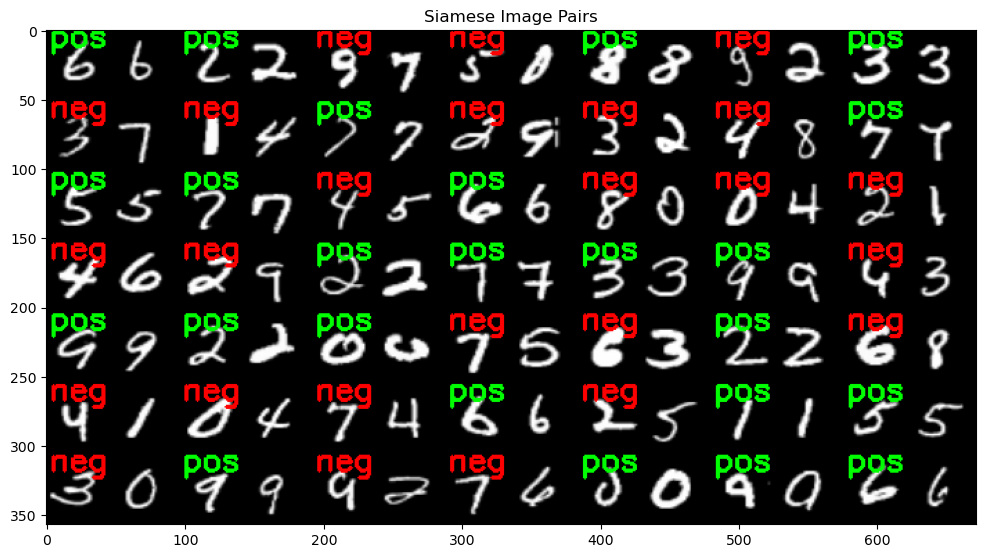

In [8]:
# loop over a sample of our training pairs
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
	# grab the current image pair and label
	imageA = pairTrain[i][0]
	imageB = pairTrain[i][1]
	label = labelTrain[i]

	# to make it easier to visualize the pairs and their positive or
	# negative annotations, we're going to "pad" the pair with four
	# pixels along the top, bottom, and right borders, respectively
	output = np.zeros((36, 60), dtype="uint8")
	pair = np.hstack([imageA, imageB])
	output[4:32, 0:56] = pair

	# set the text label for the pair along with what color we are
	# going to draw the pair in (green for a "positive" pair and
	# red for a "negative" pair)
	text = "neg" if label[0] == 0 else "pos"
	color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)

	# create a 3-channel RGB image from the grayscale pair, resize
	# it from 28x28 to 96x51 (so we can better see it), and then
	# draw what type of pair it is on the image
	vis = cv2.merge([output] * 3)
	vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
	cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)

	# add the pair visualization to our list of output images
	images.append(vis)

# construct the montage for the images
montage = build_montages(images, (96, 51), (7, 7))[0]

# show the output montage
plt_imshow("Siamese Image Pairs", montage)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Building image pairs for siamese networks with Python*](https://www.pyimagesearch.com/2020/11/23/building-image-pairs-for-siamese-networks-with-python/) blog post published on 11-23-20.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```